Program: TestforStationary
Author:  Alyssa Fedgo
Date:    June 29, 2021
Purpose: Test PGA data is stationary before applying time series modeling

In [91]:
import pandas as pd
from matplotlib import pyplot as py
import numpy as np
from functools import reduce
from statsmodels.tsa.stattools import adfuller

Read in data

In [24]:
df=pd.read_csv("Input.csv",parse_dates=['date'])
score=df[['date','Score','player']].dropna().sort_values(['player','date'])
score=score.replace('E','0')
score['Score']=score['Score'].astype(float)
score['Month']=pd.to_datetime(score['date']).dt.to_period('M')
score.head()

,date,Score,player,Month
13,2014-10-19,-9.0,Aaron Baddeley,2014-10
0,2015-02-01,-8.0,Aaron Baddeley,2015-02
2,2015-02-08,3.0,Aaron Baddeley,2015-02
1,2015-02-15,-7.0,Aaron Baddeley,2015-02
14,2015-03-29,2.0,Aaron Baddeley,2015-03


Average score by month. Only keep some players to make it easier to visualize data

In [118]:
score_month=score.groupby(['player','Month'],as_index=False)['Score'].mean()
score_month=score_month.loc[score_month['player'].isin(['Jon Rahm','Rory McIlroy','Dustin Johnson','Justin Thomas','Patrick Cantlay'])]
score_month.set_index('Month',inplace=True)
score_pivot=score_month.pivot_table(index=["Month"], 
                    columns='player', 
                    values='Score')
score_pivot[['Jon Rahm','Rory McIlroy','Dustin Johnson','Justin Thomas','Patrick Cantlay']] = score_pivot[['Jon Rahm','Rory McIlroy','Dustin Johnson','Justin Thomas','Patrick Cantlay']].fillna(value=score_pivot[['Jon Rahm','Rory McIlroy','Dustin Johnson','Justin Thomas','Patrick Cantlay']].mean())
score_pivot.head(40)

player,Dustin Johnson,Jon Rahm,Justin Thomas,Patrick Cantlay,Rory McIlroy
Month,,,,,
2014-10,-7.430272,-8.187179,0.000000,-6.718254,-5.731250
2014-11,-7.430272,-8.187179,-13.000000,-6.718254,-5.731250
2015-01,-7.430272,-8.187179,-12.000000,-6.718254,-5.731250
2015-02,-8.333333,-12.000000,-4.000000,-6.718254,-5.731250
2015-03,5.000000,-8.187179,3.000000,-6.718254,-2.000000
2015-04,-7.430272,-8.187179,-7.500000,-6.718254,-5.731250
2015-05,-4.000000,-8.187179,-6.333333,-6.718254,-16.666667
2015-06,-9.000000,-8.187179,1.000000,-6.718254,-5.731250
2015-07,-7.430272,-8.187179,-18.000000,-6.718254,-5.731250


Plot the data to look for trends. Note. I don't see a trend such as increasing with time or seasonality where I see a repeated cycle

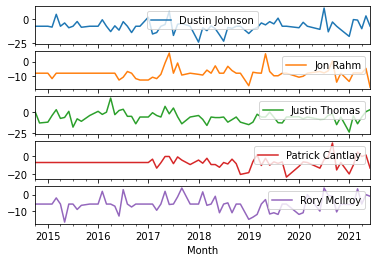

In [119]:
score_pivot.plot(subplots=True)
py.show()

Check for normal distribution. Maybe log transformation would be good

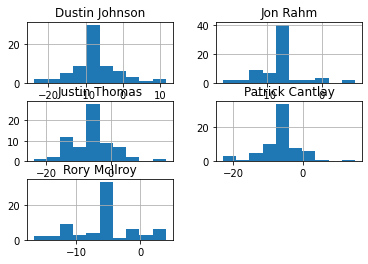

In [120]:
score_pivot.hist()
py.show()

Split data and look at means and variances for partitions

In [121]:
split = int(len(score_pivot) / 2)
X1, X2 = score_pivot.iloc[0:split], score_pivot.iloc[split:]
mean1, mean2 = pd.DataFrame(X1.mean(),columns=['mean1']), pd.DataFrame(X2.mean(),columns=['mean2'])
var1, var2 = pd.DataFrame(X1.var(),columns=['Var1']), pd.DataFrame(X2.var(),columns=['Var2'])
data_frames = [mean1, mean2, var1, var2]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['player'],
                                            how='inner'), data_frames)
df_merged

,mean1,mean2,Var1,Var2
player,,,,
Dustin Johnson,-7.316477,-7.540816,35.499200,38.809131
Jon Rahm,-8.325189,-8.053114,13.252129,17.853725
Justin Thomas,-3.749965,-7.856590,46.163570,28.181629
Patrick Cantlay,-6.168768,-7.252041,5.868574,55.183441
Rory McIlroy,-5.356618,-6.095179,15.808367,25.116207


Augmented Dickey-Fuller Test

In [126]:
adf_results = {}
for player in score_pivot.columns.values:
    print(player)
    adf_results[player] = adfuller(score_pivot[player])
    print('ADF Statistic: %f' % adf_results[player][0])
    print('p-value: %f' % adf_results[player][1])
    print('Critical Values:')
    for key, value in adf_results[player][4].items():
        print('\t%s: %.3f' % (key, value))


Dustin Johnson
ADF Statistic: -8.663772
p-value: 0.000000
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
Jon Rahm
ADF Statistic: -6.831343
p-value: 0.000000
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
Justin Thomas
ADF Statistic: -4.114736
p-value: 0.000916
Critical Values:
	1%: -3.532
	5%: -2.906
	10%: -2.590
Patrick Cantlay
ADF Statistic: -6.558854
p-value: 0.000000
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591
Rory McIlroy
ADF Statistic: -7.262953
p-value: 0.000000
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
